In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px
import requests

In [ ]:
# Leiskite vartotojui nurodyti iki trijų metreologinių stočių, 
# ir dvi datas : nuo, iki. 
# Iš meto.lt per API išgaukite istorinius duomenis nurodytame 
# laikotarpyje, ir 
# atvaizduokite grafiškai - oro temperatūrą bei vėjo greitį.

In [37]:
url = 'https://api.meteo.lt/v1/stations'
pg = requests.get(url)
r = pg.json()
stotys = {}
for i in r:
    stotys[i['name']] = i['code']
# print(stotys)
n = list(stotys.keys())
for i, k in enumerate(n):
    print(f'{i}: {k}')



0: Akmenės AMS
1: Alytaus AMS
2: Anykščių AMS
3: Birštono AMS
4: Biržų AMS
5: Dotnuvos AMS
6: Druskininkų AMS
7: Dūkšto AMS
8: Elektrėnų AMS
9: Jonavos AMS
10: Joniškio AMS
11: Jurbarko AMS
12: Kaišiadorių AMS
13: Kalvarijos AMS
14: Kauno AMS
15: Kazlų Rūdos AMS
16: Kelmės AMS
17: Klaipėdos AMS
18: Kretingos AMS
19: Kupiškio AMS
20: Kybartų AMS
21: Laukuvos AMS
22: Lazdijų AMS
23: Marijampolės AMS
24: Mažeikių AMS
25: Molėtų AMS
26: Nidos AMS
27: Pagėgių AMS
28: Pakruojo AMS
29: Panevėžio AMS
30: Plungės AMS
31: Prienų AMS
32: Raseinių AMS
33: Rietavo AMS
34: Rokiškio AMS
35: Šakių AMS
36: Šalčininkų AMS
37: Šeduvos AMS
38: Šiaulių AMS
39: Šilutės AMS
40: Skuodo AMS
41: Švenčionių AMS
42: Tauragės AMS
43: Telšių AMS
44: Trakų AMS
45: Ukmergės AMS
46: Utenos AMS
47: Varėnos AMS
48: Ventės AMS
49: Vėžaičių AMS
50: Vilniaus AMS
51: Zarasų AMS


In [38]:
stations = input('Įveskite stoties numerį(-ius) (iki trijų numerių, atskirtų kableliais)')
st_idx = list(map(int, stations.split(',')))
print('Jūs pasirinkote šias stotis:')
sel_sts = [n[i] for i in st_idx]
print(sel_sts)

Jūs pasirinkote šias stotis:
['Vilniaus AMS', 'Mažeikių AMS', 'Klaipėdos AMS']


In [39]:
codes = [stotys[key] for key in sel_sts]
# print(codes)

['vilniaus-ams', 'mazeikiu-ams', 'klaipedos-ams']


In [40]:
from datetime import date, timedelta
from dateutil import parser
nuo = input('Įveskite datą YYYY-MM-DD formatu')
iki = input('Įveskite datą YYYY-MM-DD formatu')

start_date = parser.parse(nuo)
end_date = parser.parse(iki)
delta = timedelta(days=1)
days = []
while start_date <= end_date:
    days.append(start_date.strftime("%Y-%m-%d"))
    start_date = start_date + delta

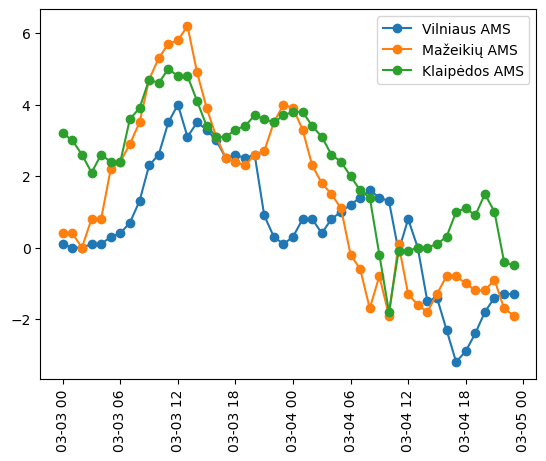

In [45]:
url_t = 'https://api.meteo.lt/v1/stations/{code}/observations/{day}'

fig, ax = plt.subplots()

for code, name in zip(codes, sel_sts):
    datos = []
    airT = []
    windS = []
    for day in days:
        pg = requests.get(url_t.format(code=code, day=day))
        if pg.status_code == 200:
            r = pg.json()
            obs = r['observations']
            df = pd.DataFrame(obs)
            df = df.iloc[:, [0,1,3]]
            df.columns = ['Time', 'T', 'W']
            df['Time'] = pd.to_datetime(df['Time'])
            datos.extend(list(df['Time'].values))
            airT.extend(df['T'].values.tolist())
            windS.extend(df['W'].values.tolist())
            pass
        else:
            continue
    ax.plot(datos, airT, label=name, marker='o')
    pass
    
ax.legend(loc='best')  
ax.tick_params(axis='x', rotation=90)
plt.show()

In [ ]:
#  https://data.gov.lt/datasets/2638/models/VietovesTemperaturaDregme/
#  nuskaitykite šiuos duomenis (atsisiuntę kaip CSV ar kitu jums priimtinu būdu)
#  atvaizduokite su scatter_mapbox, kuriose Lietuvos vietose yra įrengti registratoriai.
#  atvaizduokite vieno bet kurio vietos registratoriaus užfiksuotas temperatūras (istorinius duomenis)
#  8 cm gylyje, paviršiuje, 15 cm aukštyje.

In [46]:
pg = requests.get('https://get.data.gov.lt/datasets/gov/gtc/dirvozemio_temperatura/VietovesTemperaturaDregme')

In [48]:
d = pg.json()
d.keys()

dict_keys(['_data', '_page'])

In [49]:
df = pd.DataFrame(data=d['_data'])

In [51]:
df['vietoves_registratoriaus_id'].value_counts()

vietoves_registratoriaus_id
LT_DU_94183509    87127
LT_DU_94183522    87072
LT_DU_94183524    83040
LT_DU_94183528    83040
LT_DU_94183526    75264
LT_DU_94183525    59904
LT_DU_94183511    59903
LT_DU_94183517    55777
LT_DU_94183519    55776
LT_DU_94183520    55776
LT_DU_94183518    55775
LT_DU_94183521    54027
LT_DU_94183513    50880
LT_DU_94183515    50880
LT_DU_94183529    50880
LT_DU_94183530    50880
Name: count, dtype: int64